In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [26]:
def read_energies(filename):
    data = []
    with open(filename,'r') as f:
        lines = f.readlines()
        data_lines = lines[24:-1]
        for line in data_lines:
            data_i = line.split(' ')
            # print(data_i)
            data.append([float(data_i[4]), float(data_i[-1][:-2])])
            # print(data_i[4])
        data_i = lines[-1].split(' ')
        data.append([float(data_i[3]), float(data_i[-1][:-2])])

    return np.array(data)


In [29]:
def combine_energy(filenames):
    data = []
    for filename in filenames:
        data.append(read_energies(filename))

    return np.concatenate(data)

In [116]:
filenames = []
for i in range(0,1000):
    filenames.append(f'./step{i}/8.xvg')

data = combine_energy(filenames)
energies = data[:,1]
print(energies.shape)

(101000,)


In [44]:
def get_traj(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        data = []
        for line in lines[34:]:
            data_i = line.split(' ')
            # print(data_i)
            data.append([float(data_i[0]), float(data_i[2])])

    return np.array(data)

In [117]:
ramas = get_traj('replica_8.xvg')
print(ramas.shape)

(101000, 2)


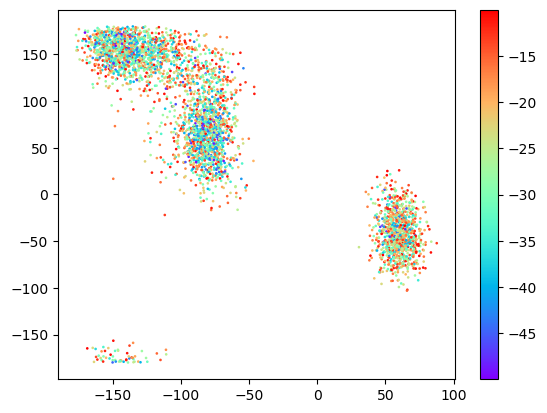

In [110]:

test = 5000
rama1 = ramas[:test,0]
rama2 = ramas[:test,1]
profile = energies[:test]
mask = np.where(((profile<-10)&(profile>-50)))
plt.scatter(rama1[mask], rama2[mask], c=energies[mask], s=0.8, cmap='rainbow')
plt.colorbar()

/var/folders/7j/cvw70m196yv54hsvlnttb3500000gn/T/ipykernel_1807/687632895.py:50: RuntimeWarning: divide by zero encountered in log
  RC_G=-np.log(RC_counts)*THERMO_CONSTANT*998
/var/folders/7j/cvw70m196yv54hsvlnttb3500000gn/T/ipykernel_1807/687632895.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("jet")
/var/folders/7j/cvw70m196yv54hsvlnttb3500000gn/T/ipykernel_1807/687632895.py:68: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(_x, _y, RC_G.transpose(),levels=11, colors='black', vmin=0, vmax=10, linewidth=0.5)


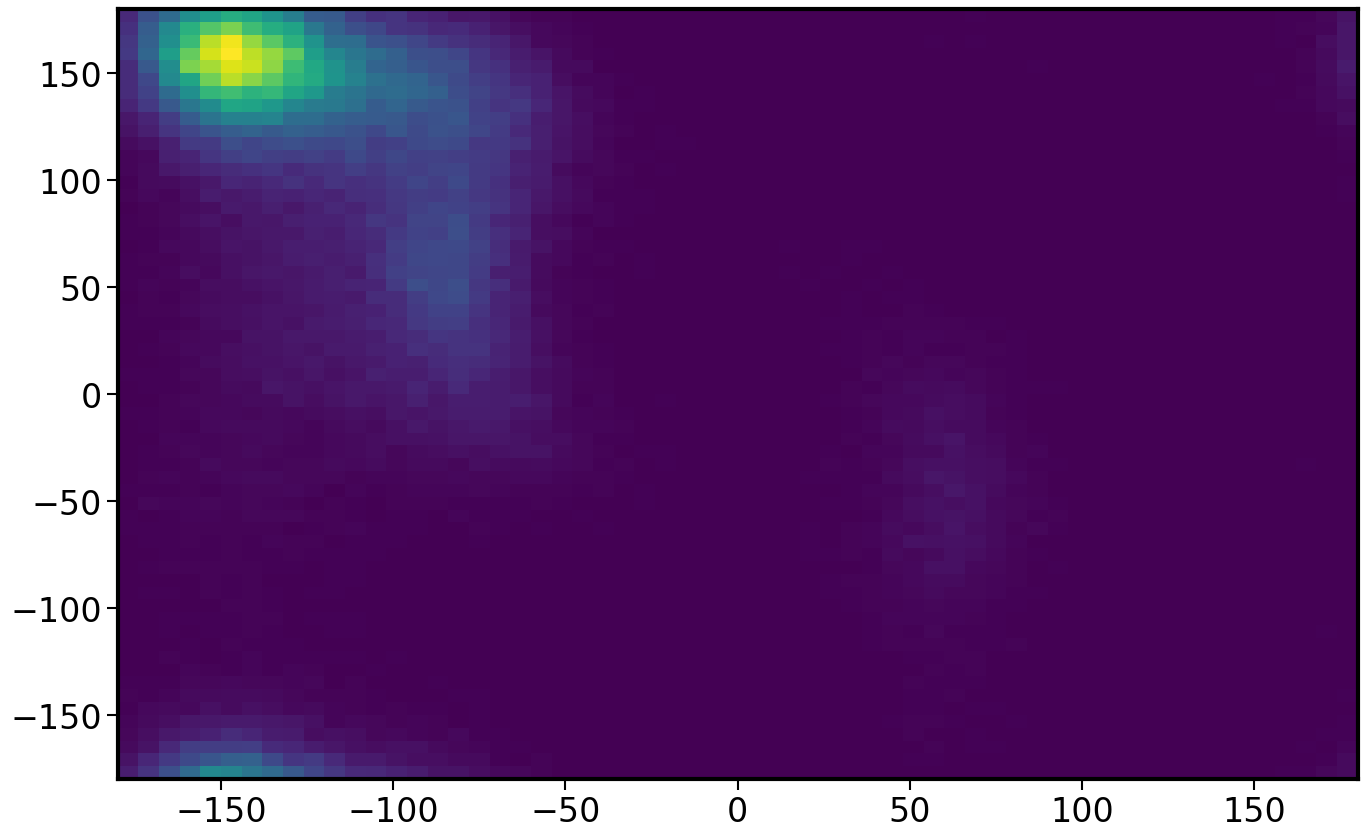

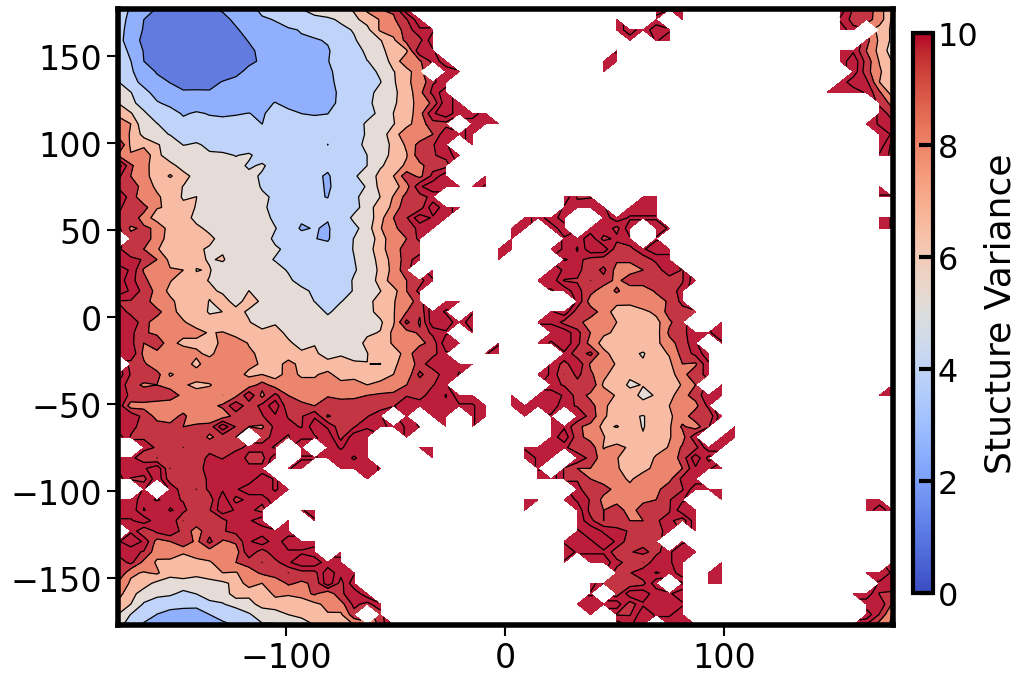

In [124]:
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
# import pandas as pd
from tqdm import trange, tqdm
import matplotlib as mpl
%matplotlib inline

large = 54; med = 30; small = 24
l_width = 3; m_width = 1.5; s_width = 0.7
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'legend.title_fontsize':med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large,
          'lines.linewidth': l_width,
          'lines.markersize': 10,
          'axes.linewidth': l_width,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'xtick.minor.size': 4,
          'ytick.minor.size': 4,
          'xtick.major.width': m_width,
          'ytick.major.width': m_width,
          'xtick.minor.width': s_width,
          'ytick.minor.width': s_width,
          'grid.linewidth': m_width}
plt.rcParams.update(params)


# tica_trajs = np.load("../06_tica_projection/kras_vhl_spectral-oasis_1500features_300ns5tica_project_trajs.npy", allow_pickle=True).item()
# tica_trajs = [i for i in tica_trajs.values()]
# _ttrajs = np.concatenate(tica_trajs)
# macro_trajs = np.load("./kras_vhl_1500features_300ns5tica_100kmeans_10ns6pcca+_trajs.npy", allow_pickle=True)
# macro_trajs = np.concatenate(macro_trajs)

# idx1 = 0; idx2 = 2

from scipy.constants import Avogadro, Boltzmann, calorie_th, R
THERMO_CONSTANT = 10**-3 * Boltzmann * Avogadro / calorie_th

RC_counts,RC_xbins,RC_ybins,images = plt.hist2d(ramas[:,0],ramas[:,1],bins=60)
# RC_counts[RC_counts==0]=RC_counts[RC_counts!=0].min()
RC_counts[RC_counts==0]=0
RC_G=-np.log(RC_counts)*THERMO_CONSTANT*998
RC_G=RC_G-np.nanmin(RC_G)

_x = np.zeros(len(RC_xbins)-1); _y = np.zeros(len(RC_ybins)-1)
for i in range(len(RC_xbins)-1):
    _x[i] = (RC_xbins[i] + RC_xbins[i+1]) / 2
    _y[i] = (RC_ybins[i] + RC_ybins[i+1]) / 2


cm = plt.cm.get_cmap("jet")
z = np.linspace(0, 1, 20)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# for i in range(6):
#     plt.scatter(_ttrajs[macro_trajs==int(i)][:, idx1], _ttrajs[macro_trajs==int(i)][:, idx2], s=0.1)
plt.contourf(_x, _y,RC_G.transpose(),levels=11, cmap='coolwarm', vmin=0, vmax=10, alpha=0.9)
plt.rcParams["lines.linewidth"]=0.9
plt.contour(_x, _y, RC_G.transpose(),levels=11, colors='black', vmin=0, vmax=10, linewidth=0.5)
l = 0.92; b = 0.15; w = 0.02; h = 0.7
rect = [l, b, w, h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=10), cmap=plt.cm.coolwarm), cax=cbar_ax)
cb.ax.tick_params(labelsize=26)
cb.set_label('Stucture Variance',fontsize=26)
ax.spines['bottom'].set_linewidth(4.0)
ax.spines['left'].set_linewidth(4.0)
ax.spines['top'].set_linewidth(4.0)
ax.spines['right'].set_linewidth(4.0)
plt.tick_params(which='major', width=3, direction='in', labelsize=23, length=10)
plt.tick_params(which='minor', width=1, direction='in', length=7)